In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# use Keras to import pre-shuffled MNIST database
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=3000)

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [6]:
# TODO: Build the model architecture
import numpy as py
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# TODO: Compile the model using a loss function and an optimizer.
models = Sequential()
models.add(Dense(512,activation='relu',input_dim=1000))
models.add(Dropout(0.5))
models.add(Dense(num_classes,activation='softmax'))
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


In [7]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
models.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
hist = models.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test, y_test),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 11s - loss: 0.3983 - acc: 0.8270 - val_loss: 0.3506 - val_acc: 0.8489
Epoch 2/10
 - 10s - loss: 0.3334 - acc: 0.8672 - val_loss: 0.3405 - val_acc: 0.8622
Epoch 3/10
 - 10s - loss: 0.3219 - acc: 0.8740 - val_loss: 0.3588 - val_acc: 0.8613
Epoch 4/10
 - 10s - loss: 0.3136 - acc: 0.8826 - val_loss: 0.4344 - val_acc: 0.8391
Epoch 5/10
 - 10s - loss: 0.3049 - acc: 0.8870 - val_loss: 0.3953 - val_acc: 0.8585
Epoch 6/10
 - 10s - loss: 0.2960 - acc: 0.8944 - val_loss: 0.4003 - val_acc: 0.8603
Epoch 7/10
 - 10s - loss: 0.2904 - acc: 0.9018 - val_loss: 0.4259 - val_acc: 0.8597
Epoch 8/10
 - 11s - loss: 0.2776 - acc: 0.9068 - val_loss: 0.4366 - val_acc: 0.8596
Epoch 9/10
 - 12s - loss: 0.2676 - acc: 0.9152 - val_loss: 0.4637 - val_acc: 0.8593
Epoch 10/10
 - 13s - loss: 0.2553 - acc: 0.9201 - val_loss: 0.5065 - val_acc: 0.8562


In [10]:
hist

In [16]:
hist_dict = hist.history
hist_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

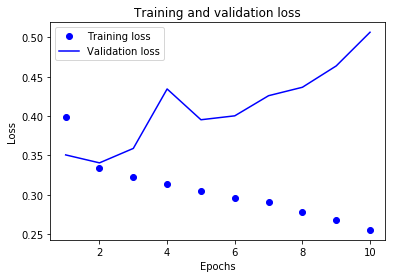

In [21]:
import matplotlib.pyplot as plt

hist_dict = hist.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1, 10 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')#bo:blue dot蓝点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')#b: blue蓝色
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

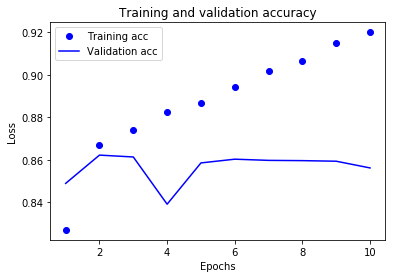

In [24]:
plt.clf()

acc_values = hist_dict['acc']
val_acc_values = hist_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(1000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=9,batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
25000/25000 [==============================] - 1s 34us/step - loss: 0.5999 - acc: 0.7077
Epoch 2/9
25000/25000 [==============================] - 0s 19us/step - loss: 0.4129 - acc: 0.8393
Epoch 3/9
25000/25000 [==============================] - 0s 19us/step - loss: 0.3443 - acc: 0.8593
Epoch 4/9
25000/25000 [==============================] - 1s 23us/step - loss: 0.3224 - acc: 0.8670
Epoch 5/9
25000/25000 [==============================] - 1s 21us/step - loss: 0.3123 - acc: 0.8698
Epoch 6/9
25000/25000 [==============================] - 1s 20us/step - loss: 0.3077 - acc: 0.8724
Epoch 7/9
25000/25000 [==============================] - 0s 20us/step - loss: 0.3052 - acc: 0.8736
Epoch 8/9
25000/25000 [==============================] - 1s 33us/step - loss: 0.3029 - acc: 0.8755
Epoch 9/9
25000/25000 [==============================] - 1s 31us/step
[0.3324892447757721, 0.85814]


In [34]:
model.predict(x_test)

array([[0.6801508 , 0.37292436],
       [0.00211297, 0.99557304],
       [0.6559276 , 0.44993895],
       ...,
       [0.8826047 , 0.07730299],
       [0.87138724, 0.13029045],
       [0.7077372 , 0.3369157 ]], dtype=float32)

In [40]:
score = models.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.85616
